<a href="https://colab.research.google.com/github/fechinmitchell/CMC_GAA_STATS/blob/main/ShotStatsAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_excel('/content/Football_Championship_2023_Shots.xlsx')  # Update the path to your file

# Pre-process the data if necessary (e.g., converting data types)
# This step depends on the structure of your dataset and is optional

# Define functions to calculate various statistics

def calculate_efficiency(df):
    attempts = df.groupby('TeamName').size()
    scores = df[df['Score'] == 'Score'].groupby('TeamName').size()
    efficiency = (scores / attempts).fillna(0)
    return efficiency.mean()

def calculate_average_shot_distance_with_and_without_pressure(df):
    shots_with_pressure = df[df['Pressure'] == 'y']['Shot_Distance'].mean()
    shots_without_pressure = df[df['Pressure'] == 'n']['Shot_Distance'].mean()
    return shots_with_pressure, shots_without_pressure

def calculate_success_rate_by_distance_and_pressure(df):
    avg_shot_distance = df['Shot_Distance'].mean()
    success_rate_distance_no_pressure = df[(df['Shot_Distance'] > avg_shot_distance) & (df['Pressure'] == 'n') & (df['Score'] == 'Score')].shape[0] / df[(df['Shot_Distance'] > avg_shot_distance) & (df['Pressure'] == 'n')].shape[0]
    success_rate_closer_with_pressure = df[(df['Shot_Distance'] <= avg_shot_distance) & (df['Pressure'] == 'y') & (df['Score'] == 'Score')].shape[0] / df[(df['Shot_Distance'] <= avg_shot_distance) & (df['Pressure'] == 'y')].shape[0]
    return success_rate_distance_no_pressure, success_rate_closer_with_pressure

# Calculate overall statistics
total_efficiency = calculate_efficiency(df)
avg_distance_with_pressure, avg_distance_without_pressure = calculate_average_shot_distance_with_and_without_pressure(df)
success_rate_distance_no_pressure, success_rate_closer_with_pressure = calculate_success_rate_by_distance_and_pressure(df)

print(f"Total Efficiency: {total_efficiency}")
print(f"Average Shot Distance with Pressure: {avg_distance_with_pressure}")
print(f"Average Shot Distance without Pressure: {avg_distance_without_pressure}")
print(f"Success Rate for Distant Shots without Pressure: {success_rate_distance_no_pressure}")
print(f"Success Rate for Closer Shots with Pressure: {success_rate_closer_with_pressure}")


Total Efficiency: 0.5757229624537874
Average Shot Distance with Pressure: 27.469219999999996
Average Shot Distance without Pressure: 33.02622668579627
Success Rate for Distant Shots without Pressure: 0.5300925925925926
Success Rate for Closer Shots with Pressure: 0.5517241379310345


In [ ]:
!pip install pandas matplotlib

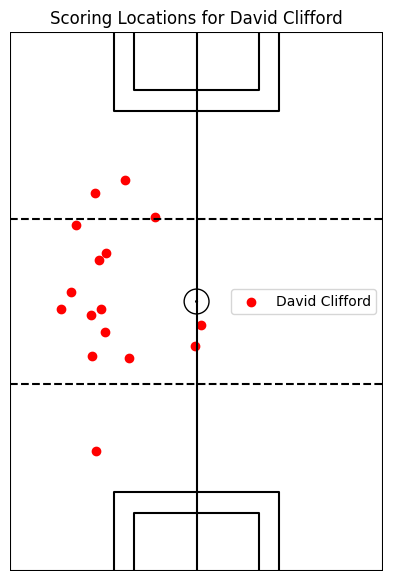

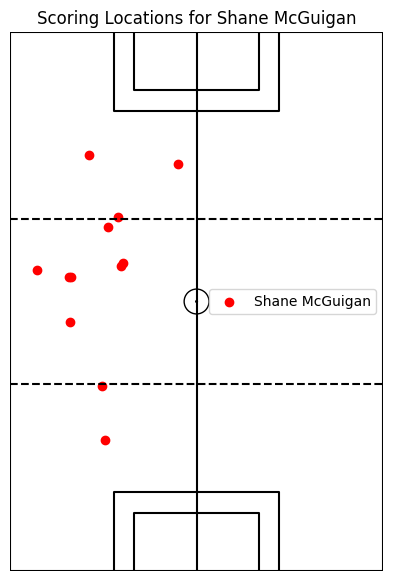

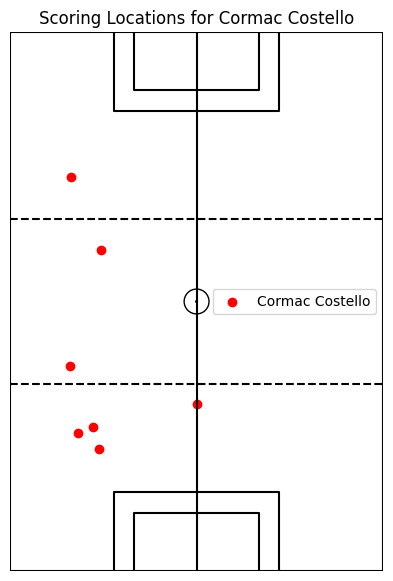

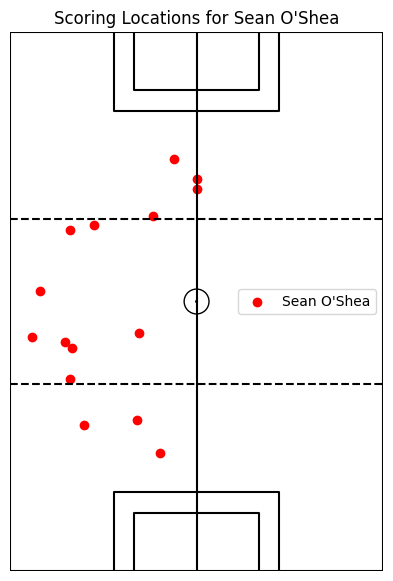

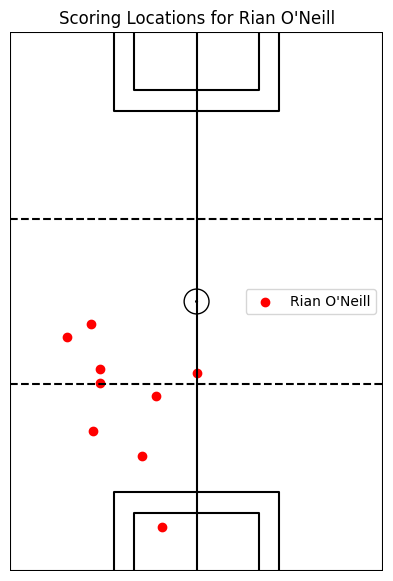

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_excel('/content/Football_Championship_2023_Shots.xlsx')  # Update the file path as needed

# Assuming 'Score' column indicates a score with a value and 'PlayerName' for the player's name
df['IsScore'] = df['Score'].apply(lambda x: 1 if x == 'Score' else 0)

# Identify the top 5 scorers
top_scorers = df.groupby('PlayerName')['IsScore'].sum().sort_values(ascending=False).head(5).index

def draw_gaa_pitch():
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.set_xlim(0, 90)
    ax.set_ylim(0, 130)

    # Pitch outline and centre line
    plt.plot([0, 0, 90, 90, 0], [0, 130, 130, 0, 0], color="black")
    plt.plot([45, 45], [0, 130], color="black")

    # Centre circle and centre mark
    ax.add_patch(patches.Circle((45, 65), 3, edgecolor="black", facecolor="none"))
    ax.add_patch(patches.Circle((45, 65), 0.2, edgecolor="black", facecolor="black"))

    # Goal areas
    plt.plot([30, 30, 60, 60], [0, 14, 14, 0], color="black")  # Bottom small rectangle
    plt.plot([30, 30, 60, 60], [130, 116, 116, 130], color="black")  # Top small rectangle
    plt.plot([25, 25, 65, 65], [0, 19, 19, 0], color="black")  # Bottom large rectangle
    plt.plot([25, 25, 65, 65], [130, 111, 111, 130], color="black")  # Top large rectangle

    # 45-meter lines
    plt.plot([0, 90], [45, 45], color="black", linestyle="--")
    plt.plot([0, 90], [85, 85], color="black", linestyle="--")

    ax.set_aspect(1)
    ax.axis('off')

def plot_top_scorers(top_scorers, df):
    for scorer in top_scorers:
        scorer_shots = df[(df['PlayerName'] == scorer) & (df['IsScore'] == 1)][['x', 'y']]
        draw_gaa_pitch()
        plt.scatter(scorer_shots['x'], scorer_shots['y'] * (130/100), color='red', label=scorer)  # Adjust y-axis scale if necessary
        plt.legend()
        plt.title(f'Scoring Locations for {scorer}')
        plt.show()

plot_top_scorers(top_scorers, df)

